In [12]:
import torch
from torch import nn

from torchvision import datasets, transforms
from torch.utils.data import DataLoader


# Define the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

# Download and load the training data
train_dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=64, shuffle=True
)

# Download and load the test data
test_dataset = datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=1000, shuffle=False
)

# Checking the dataset
for images, labels in train_loader:
    print(f"Image batch dimensions: {images.shape}")
    print(f"Image label dimensions: {labels.shape}")
    break

Image batch dimensions: torch.Size([64, 1, 28, 28])
Image label dimensions: torch.Size([64])


In [14]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# Training the model
n_epochs = 5
for epoch in range(n_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Testing the model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Accuracy: {100 * correct / total}")


Epoch 1, Loss: 0.009488362818956375
Epoch 2, Loss: 0.051751758903265
Epoch 3, Loss: 0.0034018203150480986
Epoch 4, Loss: 0.0013380642049014568
Epoch 5, Loss: 0.19587314128875732
Accuracy: 98.32


Parameter containing:
tensor([[[[0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.

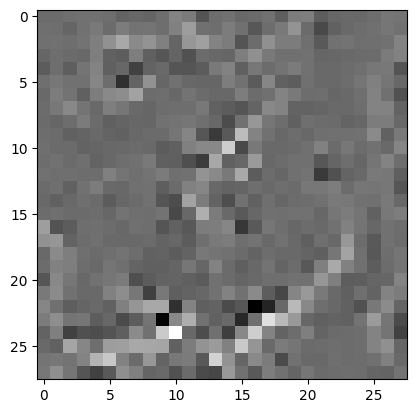

In [16]:
# Using gradient descent, we will find the input image that maximizes the label for 3
input_tensor = nn.Parameter(0.5 * torch.ones((1, 1, 28, 28), requires_grad=True))
input_optimizer = torch.optim.SGD([input_tensor], lr=0.01)

model.train()
n_epochs = 100000
for epoch in range(n_epochs):
    input_optimizer.zero_grad()
    output = model(input_tensor)
    loss = -output[0, 3]
    loss.backward()
    input_optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Display the image
import matplotlib.pyplot as plt

plt.imshow(input_tensor.detach().numpy()[0, 0], cmap="gray")
plt.show()
